In [ ]:
# Data Analysis & Data Wrangling
import numpy as np
import pandas as pd

# Algorithm for statistical analysis - like ANOVA, normality and variance
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Service.csv')

In [ ]:
df.head(10)

,Technician,Manufacturer,Job,Service_Time
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69
5,1,2,1,57
6,1,2,2,45
7,1,2,3,39
8,1,2,4,54
9,1,2,5,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Manufacturer  45 non-null     int64
 2   Job           45 non-null     int64
 3   Service_Time  45 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [ ]:
df.shape

(45, 4)

In [ ]:

df.describe()

,Technician,Manufacturer,Job,Service_Time
count,45.000000,45.000000,45.000000,45.000000
mean,2.000000,2.000000,3.000000,55.822222
std,0.825723,0.825723,1.430194,8.448477
min,1.000000,1.000000,1.000000,39.000000
25%,1.000000,1.000000,2.000000,50.000000
50%,2.000000,2.000000,3.000000,56.000000
75%,3.000000,3.000000,4.000000,62.000000
max,3.000000,3.000000,5.000000,70.000000


In [ ]:
df['Manufacturer'].value_counts()

1    15
2    15
3    15
Name: Manufacturer, dtype: int64

In [ ]:
df['Technician'].value_counts()

1    15
2    15
3    15
Name: Technician, dtype: int64

# ***1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both ‘Manufacturer’ and ‘Technician' individually***


In [ ]:
## One way ANOVA for Manufacturer
#Null Hypothesis H0: The mean service time is the same across all.
#Alternate Hypothesis H1: The mean service time is different in at least one category of manufacturer.


In [ ]:
## One way ANOVA for Technician
#Null Hypothesis H0: The mean service time is the same across all.
#Alternate Hypothesis H1: The mean service time is different in at least one category of technician.

In [ ]:
## The above hypothesis we assume 0.05 confidence levels

# ***1.2 Perform one-way ANOVA for Manufacturer with respect to the variable ‘Service Time’. State whether the null hypothesis is accepted or rejected based on the ANOVA results***

In [ ]:
formula = 'Service_Time ~ C(Manufacturer)' ## y = f(X)
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                   df       sum_sq    mean_sq         F    PR(>F)
C(Manufacturer)   2.0    28.311111  14.155556  0.191029  0.826822
Residual         42.0  3112.266667  74.101587       NaN       NaN


# ***1.3 Perform one-way ANOVA for variable Technician with respect to the variable ‘Service Time’. State whether the null hypothesis is accepted or rejected based on the ANOVA results***


In [ ]:
formula = 'Service_Time ~ C(Technician)' ## y = f(X)
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)


                 df       sum_sq    mean_sq        F    PR(>F)
C(Technician)   2.0    24.577778  12.288889  0.16564  0.847902
Residual       42.0  3116.000000  74.190476      NaN       NaN


# ***1.4 Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments?***
[hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python]


In [ ]:
# INTERACTION PLOT

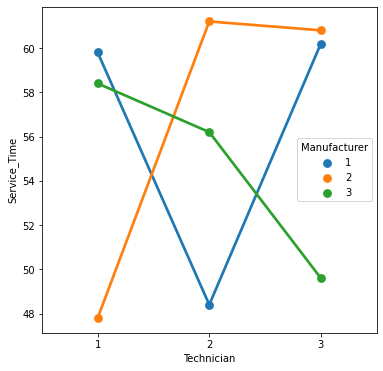

In [ ]:
plt.figure(figsize=(6,6))
sns.pointplot(data=df, x=df['Technician'], y=df['Service_Time'], hue=df['Manufacturer'], ci=None);

# ***1.5 Perform a two-way ANOVA based on the variables ‘Manufacturer’ & ‘Technician’ with respect to the variable ‘Service Time’ and state your results.***

In [ ]:
formula = 'Service_Time ~ C(Manufacturer) + C(Technician) + C(Manufacturer):C(Technician)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Manufacturer),2.0,28.311111,14.155556,0.272164,0.763283
C(Technician),2.0,24.577778,12.288889,0.236274,0.790779
C(Manufacturer):C(Technician),4.0,1215.288889,303.822222,5.841487,0.000994
Residual,36.0,1872.400000,52.011111,NaN,NaN


# ***1.6 Explain the business implications of performing ANOVA for this particular case study***

 CONCLUSION 
 The above TWO way ANOVA test we clearly see that p-value is greater than significance level(alpha = 0.05),
 we accept null hypothesis. 

(there is no interaction effect between the 2 independent variables, Manufacturer & Technician)

***END***